In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.manifold import TSNE




data = pd.read_csv('California_Fire_Incidents.csv')

data.shape
#Tаблица содержит 1636 строк (объектов) и 40 столбцов (признаков).

(1636, 40)

In [2]:
data.head()

,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,Counties,...,SearchKeywords,Started,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders
0,257314.0,False,Stanislaus National Forest/Yosemite National Park,NaN,2013,True,/incidents/2013/8/17/rim-fire/,NaN,NaN,Tuolumne,...,"Rim Fire, Stanislaus National Forest, Yosemite...",2013-08-17T15:25:00Z,Finalized,NaN,NaN,NaN,NaN,5fb18d4d-213f-4d83-a179-daaf11939e78,2013-09-06T18:30:00Z,NaN
1,30274.0,False,USFS Angeles National Forest/Los Angeles Count...,NaN,2013,True,/incidents/2013/5/30/powerhouse-fire/,NaN,NaN,Los Angeles,...,"Powerhouse Fire, May 2013, June 2013, Angeles ...",2013-05-30T15:28:00Z,Finalized,NaN,NaN,NaN,NaN,bf37805e-1cc2-4208-9972-753e47874c87,2013-06-08T18:30:00Z,NaN
2,27531.0,False,CAL FIRE Riverside Unit / San Bernardino Natio...,NaN,2013,True,/incidents/2013/7/15/mountain-fire/,NaN,NaN,Riverside,...,"Mountain Fire, July 2013, Highway 243, Highway...",2013-07-15T13:43:00Z,Finalized,NaN,NaN,NaN,NaN,a3149fec-4d48-427c-8b2c-59e8b79d59db,2013-07-30T18:00:00Z,NaN
3,27440.0,False,Tahoe National Forest,NaN,2013,False,/incidents/2013/8/10/american-fire/,NaN,NaN,Placer,...,"American Fire, August 2013, Deadwood Ridge, Fo...",2013-08-10T16:30:00Z,Finalized,NaN,NaN,NaN,NaN,8213f5c7-34fa-403b-a4bc-da2ace6e6625,2013-08-30T08:00:00Z,NaN
4,24251.0,False,Ventura County Fire/CAL FIRE,NaN,2013,True,/incidents/2013/5/2/springs-fire/,Acreage has been reduced based upon more accur...,NaN,Ventura,...,"Springs Fire, May 2013, Highway 101, Camarillo...",2013-05-02T07:01:00Z,Finalized,6.0,10.0,NaN,NaN,46731fb8-3350-4920-bdf7-910ac0eb715c,2013-05-11T06:30:00Z,11.0


In [3]:
#Описание признаков:
#    AcresBurned: Акров земли, пострадавших от лесных пожаров
#    Active: Является ли пожар активным или локализованным?
#    AdminUnit: Административное подразделение
#    AirTankers: Выделенные ресурсы
#    ArchiveYear: Год, когда данные были заархивированы
#    CalFireIncident: Рассматривается ли этот инцидент как инцидент с пожаром?
#    Counties: Название округа
#    CountyIds: Идентификационный номер округа
#    CrewsInvolved: Вовлеченные экипажи
#    Dozers: Выделенные бульдозеры
#    Engines: Выделенные машины
#    Extinguished: Дата погашения
#    Fatalities: Количество погибших
#    Helicopters: Выделенные вертолеты
#    Injuries: Количество раненых среди персонала
#    Latitude: Широта инцидента с лесным пожаром
#    Location: Описание местоположения
#    Longitude: Долгота инцидента с лесным пожаром
#    MajorIncident: Считается ли это серьезным инцидентом или нет?
#    Name: Название лесного пожара
#    PercentContained: Какой процент пожара локализован?
#    PersonnelInvolved: Вовлеченный персонал
#    Started: Дата начала пожара
#    StructuresDamaged: Количество поврежденных конструкций
#    StructuresDestroyed: Количество разрушенных сооружений
#    StructuresThreatened: Количество сооружений, находящихся под угрозой
#    WaterTenders: Выделенные объем воды
#        
#Из них категориальные:
#    AdminUnit
#    Counties
#    CountyIds
#    Name

In [4]:
#Counties и CountyIds обозаначают обно и тоже, поэтому рассматриваю только один из них

unique = [[], [], []]
k = 0

for i in ['AdminUnit', 'Counties', 'Name']:
    for j in range(0, 1636):
        if not(data[i][j] in unique[k]):
            unique[k].append(data[i][j])
    
    k=k+1

for i in unique:
    print(len(i))
    

494
59
1193


In [5]:
#Столбецом с макимальным количеством уникальных значений категориального признака является Name
#с количеством уникальных значений 1193
data = data.drop(['AdminUnit', 'Counties', 'CountyIds', 'Name'], axis = 1)

In [6]:
#Есть бинарные признаки, к ним относятся:
#    Active
#    CalFireIncident
#    Featured
#    Final
#    MajorIncident
#    Public
#    Status

bin_cols = ['Active', 'CalFireIncident', 'Featured', 'Final', 'MajorIncident', 'Public', 'Status']

data['Active'] = np.where(data['Active'] == 'False', 0, 1)
data['CalFireIncident'] = np.where(data['CalFireIncident'] == 'False', 0, 1)
data['Featured'] = np.where(data['Featured'] == 'False', 0, 1)
data['Final'] = np.where(data['Final'] == 'False', 0, 1)
data['MajorIncident'] = np.where(data['MajorIncident'] == 'False', 0, 1)
data['Public'] = np.where(data['Public'] == 'False', 0, 1)
data['Status'] = np.where(data['Status'] == 'Inactive', 0, 1)

D:\Programs\Anaconda\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [7]:
col = []
j = 0
for i in data.isna().any():
    if i:
        col.append(data.columns[j])
    j+=1

print(col, " : ", len(col))

['AcresBurned', 'AirTankers', 'ConditionStatement', 'ControlStatement', 'CrewsInvolved', 'Dozers', 'Engines', 'Extinguished', 'Fatalities', 'FuelType', 'Helicopters', 'Injuries', 'PercentContained', 'PersonnelInvolved', 'SearchDescription', 'SearchKeywords', 'StructuresDamaged', 'StructuresDestroyed', 'StructuresEvacuated', 'StructuresThreatened', 'WaterTenders']  :  21


In [8]:
#Пропуски присутствуют в 21 столбце
#Эти столбцы видны выше

In [9]:
data_temp = data

count_na = []

for i in col:
    data_temp[i].dropna()
    count_na.append(1636 - data_temp[i].count())
    
#for i, j in zip(col, count_na):
#    if j > 1500:
#        data = data.drop([i], axis = 1)
#
#data = data.dropna()
    

print(count_na, "\n",col[count_na.index(max(count_na))], max(count_na))


[3, 1608, 1352, 1525, 1465, 1513, 1445, 59, 1615, 1624, 1552, 1516, 3, 1432, 17, 203, 1569, 1461, 1636, 1606, 1490] 
 StructuresEvacuated 1636


In [10]:
#StructuresEvacuated полностью пустой столбец

In [11]:
#В датасете имеется много столбцов с метаданными, которые неудобно обрабатывать, которые следует исключить
data = data.drop(['ArchiveYear', 'CanonicalUrl', 'ConditionStatement', 'ControlStatement', 'Extinguished', 'FuelType', 'Location', 'SearchDescription', 'SearchKeywords', 'Started', 'UniqueId', 'Updated'], axis = 1)


#Cтатистический анализ числовых столбцов
data.describe()

,AcresBurned,Active,AirTankers,CalFireIncident,CrewsInvolved,Dozers,Engines,Fatalities,Featured,Final,...,MajorIncident,PercentContained,PersonnelInvolved,Public,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,WaterTenders
count,1633.000000,1636.0,28.000000,1636.0,171.000000,123.000000,191.000000,21.000000,1636.0,1636.0,...,1636.0,1633.0,204.000000,1636.0,1636.000000,67.000000,175.000000,0.0,30.000000,146.000000
mean,4589.443968,1.0,4.071429,1.0,11.561404,7.585366,23.565445,8.619048,1.0,1.0,...,1.0,100.0,328.553922,1.0,0.998778,67.970149,271.788571,NaN,522.800000,7.815068
std,27266.337722,0.0,6.399818,0.0,14.455633,14.028616,41.004424,18.529642,0.0,0.0,...,0.0,0.0,521.138789,0.0,0.034953,155.771975,1557.255963,NaN,739.586856,12.719251
min,0.000000,1.0,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,1.0,1.0,...,1.0,100.0,0.000000,1.0,0.000000,0.000000,0.000000,NaN,0.000000,1.000000
25%,35.000000,1.0,2.000000,1.0,2.500000,1.000000,5.000000,1.000000,1.0,1.0,...,1.0,100.0,55.000000,1.0,1.000000,1.000000,1.000000,NaN,0.000000,2.000000
50%,100.000000,1.0,2.000000,1.0,6.000000,2.000000,11.000000,3.000000,1.0,1.0,...,1.0,100.0,151.500000,1.0,1.000000,6.000000,7.000000,NaN,45.000000,4.000000
75%,422.000000,1.0,4.000000,1.0,13.500000,5.000000,24.000000,6.000000,1.0,1.0,...,1.0,100.0,350.000000,1.0,1.000000,49.500000,41.500000,NaN,1043.750000,6.000000
max,410203.000000,1.0,27.000000,1.0,82.000000,76.000000,256.000000,85.000000,1.0,1.0,...,1.0,100.0,3100.000000,1.0,1.000000,783.000000,18804.000000,NaN,2600.000000,79.000000


In [12]:
#Анамальные отклонения в столбцах AcresBurned, CrewsInvolved, Dozers, Engines, Fatalities, 
#Injuries, PersonnelInvolved, StructuresDamaged, StructuresDestroyed, WaterTenders

In [13]:
# Нормализация признаков через стандартное отклонение
data = data.fillna(0)

num_cols = ['AcresBurned', 'AirTankers', 'CrewsInvolved', 'Dozers', 'Engines', 'Fatalities', 'Helicopters', 'Injuries', 'PersonnelInvolved', 'StructuresDamaged', 'StructuresDestroyed', 'WaterTenders']
scale_features_std = StandardScaler()
features_std = scale_features_std.fit_transform(data[num_cols+bin_cols])

data[num_cols+bin_cols] = features_std

In [14]:
mean = []
s = 0
for i in range(0,1):
    for j in range(0,1425):
        s += features_std[j][i]
    s = s/1636
    mean.append(s)
    s = 0

print(num_cols[mean.index(max(mean))], max(mean))

AcresBurned 0.02101279792285782


In [15]:
#Столбецом с максимальным средним значением после нормировки признаков через стандартное отклонение является CrewsInvolved

In [16]:
#Явного столбца, который бы оценивал силу пожара, нет, поэтому буду опираться на площадь выжженных лесов

#Нормализуем данные
#d = preprocessing.normalize(data, axis = 0)
#norm_data = pd.DataFrame(d, columns = data.columns)
#new_data = pd.concat([norm_data, data[bin_cols]], sort = False, axis = 1)

target = data.loc[:, data.columns.isin(['AcresBurned'])]
train = data.drop(['AcresBurned'], axis = 1)
train

,Active,AirTankers,CalFireIncident,CrewsInvolved,Dozers,Engines,Fatalities,Featured,Final,Helicopters,...,MajorIncident,PercentContained,PersonnelInvolved,Public,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,WaterTenders
0,0.0,-0.071312,0.0,-0.206563,-0.131962,-0.173128,-0.048805,0.0,0.0,-0.136244,...,0.0,100.0,-0.192104,0.0,0.034986,-0.081717,-0.056478,0.0,0.0,-0.158743
1,0.0,-0.071312,0.0,-0.206563,-0.131962,-0.173128,-0.048805,0.0,0.0,-0.136244,...,0.0,100.0,-0.192104,0.0,0.034986,-0.081717,-0.056478,0.0,0.0,-0.158743
2,0.0,-0.071312,0.0,-0.206563,-0.131962,-0.173128,-0.048805,0.0,0.0,-0.136244,...,0.0,100.0,-0.192104,0.0,0.034986,-0.081717,-0.056478,0.0,0.0,-0.158743
3,0.0,-0.071312,0.0,-0.206563,-0.131962,-0.173128,-0.048805,0.0,0.0,-0.136244,...,0.0,100.0,-0.192104,0.0,0.034986,-0.081717,-0.056478,0.0,0.0,-0.158743
4,0.0,-0.071312,0.0,7.827344,1.719186,7.189400,-0.048805,0.0,0.0,5.312286,...,0.0,100.0,9.969045,0.0,0.034986,0.094422,-0.037052,0.0,0.0,2.344965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631,0.0,-0.071312,0.0,-0.206563,-0.131962,-0.173128,-0.048805,0.0,0.0,-0.136244,...,0.0,100.0,-0.192104,0.0,0.034986,-0.081717,-0.056478,0.0,0.0,-0.158743
1632,0.0,-0.071312,0.0,-0.206563,-0.131962,-0.173128,-0.048805,0.0,0.0,-0.136244,...,0.0,100.0,-0.192104,0.0,0.034986,-0.081717,-0.056478,0.0,0.0,-0.158743
1633,0.0,-0.071312,0.0,-0.206563,-0.131962,-0.173128,-0.048805,0.0,0.0,-0.136244,...,0.0,0.0,-0.192104,0.0,0.034986,-0.081717,-0.056478,0.0,0.0,-0.158743
1634,0.0,-0.071312,0.0,-0.206563,-0.131962,-0.173128,-0.048805,0.0,0.0,-0.136244,...,0.0,0.0,-0.192104,0.0,0.034986,-0.081717,-0.056478,0.0,0.0,-0.158743


In [17]:
#Выделяем тренировочную и тестовую выборки 
# y - целевая переменная(target)
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
print(N_train, _)


1145 23


In [18]:
#1145 объектов попадает в тренировочную выборку при использовании 
#train_test_split с параметрами test_size = 0.3, random_state = 42

In [19]:
#Корреляция признаков
corr_frame = data.corr()
corr_frame

,AcresBurned,Active,AirTankers,CalFireIncident,CrewsInvolved,Dozers,Engines,Fatalities,Featured,Final,...,MajorIncident,PercentContained,PersonnelInvolved,Public,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,WaterTenders
AcresBurned,1.000000,NaN,-0.008377,NaN,0.051387,0.173805,0.086422,0.186157,NaN,NaN,...,NaN,0.007210,0.097699,NaN,0.005766,0.242228,0.236914,NaN,0.343859,0.132689
Active,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AirTankers,-0.008377,NaN,1.000000,NaN,0.288623,0.221607,0.166288,-0.003480,NaN,NaN,...,NaN,0.003057,0.202854,NaN,0.002495,-0.003807,-0.003855,NaN,-0.003627,0.221187
CalFireIncident,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CrewsInvolved,0.051387,NaN,0.288623,NaN,1.000000,0.677081,0.831811,0.035595,NaN,NaN,...,NaN,0.008854,0.868780,NaN,0.007227,-0.004399,0.040776,NaN,0.176042,0.752517
Dozers,0.173805,NaN,0.221607,NaN,0.677081,1.000000,0.805922,0.027689,NaN,NaN,...,NaN,0.005656,0.790020,NaN,0.004617,0.019261,0.055595,NaN,0.281248,0.956586
Engines,0.086422,NaN,0.166288,NaN,0.831811,0.805922,1.000000,0.098737,NaN,NaN,...,NaN,0.007421,0.940187,NaN,0.006057,0.000104,0.103087,NaN,0.269263,0.865923
Fatalities,0.186157,NaN,-0.003480,NaN,0.035595,0.027689,0.098737,1.000000,NaN,NaN,...,NaN,0.002092,0.109937,NaN,0.001707,0.212563,0.983424,NaN,0.005497,0.019686
Featured,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Final,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
#Используем метод PCA

pca = PCA()
pca.fit(X_train)
X_pca = pca.transform(X_train)


In [21]:
for i, component in enumerate(pca.components_):
    print("{} component: {}% of initial variance".format(i + 1, 
          round(100 * pca.explained_variance_ratio_[i], 2)))
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component, train.columns)))

1 component: 57.86% of initial variance
-0.000 x Active + -0.000 x AirTankers + -0.000 x CalFireIncident + -0.000 x CrewsInvolved + -0.000 x Dozers + -0.000 x Engines + 0.000 x Fatalities + -0.000 x Featured + 0.000 x Final + -0.000 x Helicopters + -0.000 x Injuries + 1.000 x Latitude + -0.016 x Longitude + -0.000 x MajorIncident + 0.000 x PercentContained + -0.000 x PersonnelInvolved + -0.000 x Public + 0.000 x Status + -0.000 x StructuresDamaged + 0.000 x StructuresDestroyed + -0.000 x StructuresEvacuated + 0.000 x StructuresThreatened + -0.000 x WaterTenders
2 component: 39.08% of initial variance
0.000 x Active + -0.000 x AirTankers + 0.000 x CalFireIncident + 0.002 x CrewsInvolved + 0.003 x Dozers + 0.003 x Engines + 0.000 x Fatalities + 0.000 x Featured + 0.000 x Final + 0.002 x Helicopters + 0.001 x Injuries + -0.000 x Latitude + -0.009 x Longitude + 0.000 x MajorIncident + 0.000 x PercentContained + 0.002 x PersonnelInvolved + 0.000 x Public + 0.000 x Status + -0.000 x Structur

In [22]:
#90% дисперсии объясняется минимум 2-мя признаками

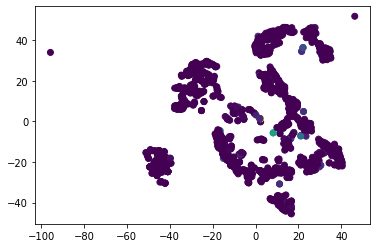

In [23]:
tsne1 = TSNE(learning_rate=200, random_state=13)

transformed1 = tsne1.fit_transform(train)

x_axist1 = transformed1[:, 0]
y_axist1 = transformed1[:, 1]

plt.scatter(x_axist1, y_axist1, c=target['AcresBurned'].tolist())
plt.show()

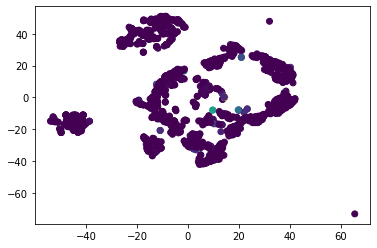

In [24]:
tsne1 = TSNE(learning_rate=200, random_state=130)

transformed1 = tsne1.fit_transform(train)

x_axist1 = transformed1[:, 0]
y_axist1 = transformed1[:, 1]

plt.scatter(x_axist1, y_axist1, c=target['AcresBurned'].tolist())
plt.show()

In [25]:
#Как видно из результатов, данный датасет не поддается кластеризации